In [ ]:
import kagglehub
# run two times this block to set the path correctly
# Download latest version
path = kagglehub.dataset_download("orvile/traffic-and-weather-datasets")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/traffic-and-weather-datasets


In [ ]:
def track_performance(method_name, start_time, start_memory, df):
    """Track performance metrics for data cleaning operations."""
    end_time = time.time()
    end_memory = psutil.Process().memory_info().rss / (1024 * 1024)  # MB

    time_taken = end_time - start_time
    throughput = len(df) / time_taken if time_taken > 0 else 0
    #throughput01 = len(df1) / time_taken if time_taken > 0 else 0
    memory_used = end_memory - start_memory  # in MB

    return {
        "Method": method_name,
        "Time (s)": time_taken,
        "Throughput (rows/s)": throughput,
        #"Second File Throughput (rows/s)": throughput01,
        "Memory Used (MB)": memory_used
    }

In [ ]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter
import pandas as pd
import os
import time
import psutil

start_time = time.time()
start_memory = psutil.Process().memory_info().rss / (1024 * 1024)

# Set the path to the file you'd like to load
file_path4 = "/kaggle/input/traffic-and-weather-datasets/Traffic and Weather Datasets/Traffic Datasets/traffic_speed_PeMSD4.csv"
file_path5 = "/kaggle/input/traffic-and-weather-datasets/Traffic and Weather Datasets/Traffic Datasets/traffic_speed_PeMSD7.csv"
#/root/.cache/kagglehub/datasets/orvile/traffic-and-weather-datasets/versions/1

# Load the dataset using pandas directly with the local file path
try:
    chunk_size = 10000  # Process data in chunks of 10,000 rows
    for df1 in pd.read_csv(file_path4, chunksize=chunk_size):
       print(track_performance("Pandas", start_time, start_memory, df1))
    #df1 = pd.read_csv(file_path4)
    #df2 = pd.read_csv(file_path5)

    # Display the first few rows of the dataset
    print("First 5 records:")
    print(df1.head())

    # Describe the dataset
    print("\n--- Dataset Description ---")
    print(f"Shape of the dataset: {df1.shape}")
    print("\nData Types of Columns:")
    print(df1.dtypes)

    pandas_result = track_performance("Pandas", start_time, start_memory, df1)
    print(pandas_result)

except FileNotFoundError:
    print(f"Error: File not found at {file_path4} or {file_path5}")
    print("Please check the contents of the downloaded directory:", os.listdir(path))
except Exception as e:
    print(f"An error occurred: {e}")

{'Method': 'Pandas', 'Time (s)': 8.556172847747803, 'Throughput (rows/s)': 1168.7468425362922, 'Memory Used (MB)': 654.078125}
{'Method': 'Pandas', 'Time (s)': 15.293267726898193, 'Throughput (rows/s)': 653.8824912096283, 'Memory Used (MB)': 961.79296875}
{'Method': 'Pandas', 'Time (s)': 24.263073205947876, 'Throughput (rows/s)': 412.1489439989238, 'Memory Used (MB)': 961.87890625}
{'Method': 'Pandas', 'Time (s)': 31.14097833633423, 'Throughput (rows/s)': 321.1202901847288, 'Memory Used (MB)': 961.890625}
{'Method': 'Pandas', 'Time (s)': 38.14900302886963, 'Throughput (rows/s)': 262.1300481281884, 'Memory Used (MB)': 961.87890625}
{'Method': 'Pandas', 'Time (s)': 44.886711835861206, 'Throughput (rows/s)': 222.7830819189284, 'Memory Used (MB)': 961.90625}
{'Method': 'Pandas', 'Time (s)': 60.72597885131836, 'Throughput (rows/s)': 164.67416728652535, 'Memory Used (MB)': 655.04296875}
{'Method': 'Pandas', 'Time (s)': 69.38276672363281, 'Throughput (rows/s)': 144.1280086139005, 'Memory Used

In [ ]:
import kagglehub
import dask.dataframe as dd
import pandas as pd
import os
import time
import psutil

# Define the dataset name
dataset_name = "orvile/traffic-and-weather-datasets"

# Define the relative paths to the CSV files within the dataset
relative_file_path4 = "Traffic and Weather Datasets/Traffic Datasets/traffic_speed_PeMSD4.csv"
relative_file_path5 = "Traffic and Weather Datasets/Traffic Datasets/traffic_speed_PeMSD7.csv"

try:
    start_time = time.time()
    start_memory = psutil.Process().memory_info().rss / (1024 * 1024)
    # Download the dataset if it's not already downloaded
    download_path = kagglehub.dataset_download(dataset_name)
    print("Path to dataset files:", download_path)

    # Construct the full paths to the files
    full_file_path4 = os.path.join(download_path, relative_file_path4)
    full_file_path5 = os.path.join(download_path, relative_file_path5)

    # Read the CSV files into Dask DataFrames
    ddf4 = dd.read_csv(full_file_path4)
    ddf5 = dd.read_csv(full_file_path5)

    print("\nDask DataFrame for traffic_speed_PeMSD4:")
    print(ddf4.info())
    print(ddf4.head())

    print("\nDask DataFrame for traffic_speed_PeMSD7:")
    print(ddf5.info())
    print(ddf5.head())
    """
    # Now you can perform Dask operations on ddf4 and ddf5 in parallel
    # For example, to calculate the mean of a column in ddf4:
    if '400000' in ddf4.columns:
        mean_value_df4 = ddf4['400000'].mean().compute()
        print(f"\nMean of '400000' in traffic_speed_PeMSD4: {mean_value_df4}")
    else:
        print("\n'400000' not found in traffic_speed_PeMSD4.")

    # Similarly for ddf5
    if '715898' in ddf5.columns:
        max_value_df5 = ddf5['715898'].max().compute()
        print(f"Max of '715898' in traffic_speed_PeMSD7: {max_value_df5}")
    else:
        print("\n'715898' not found in traffic_speed_PeMSD7.")
    """
    dask_result = track_performance("Dask", start_time, start_memory, ddf4)
    print(dask_result)
    #print(track_performance("Dask", start_time, start_memory, ddf5))

except FileNotFoundError as e:
    print(f"Error: One or more files not found: {e}")
    print(f"Please ensure the following paths are correct relative to the downloaded directory '{download_path}':")
    print(f"- {relative_file_path4}")
    print(f"- {relative_file_path5}")
except Exception as e:
    print(f"An error occurred: {e}")

Path to dataset files: /kaggle/input/traffic-and-weather-datasets

Dask DataFrame for traffic_speed_PeMSD4:
<class 'dask_expr.DataFrame'>
Columns: 4022 entries, Timestamp to 427184
dtypes: float64(4021), string(1)None
             Timestamp  400000  400001  400002  400006  400007  400009  \
0  2022-01-01 00:00:00    68.2    71.8    69.9    67.9    69.9    71.1   
1  2022-01-01 00:05:00    68.9    71.1    69.6    68.2    69.6    70.7   
2  2022-01-01 00:10:00    68.0    70.9    69.6    66.7    69.6    70.6   
3  2022-01-01 00:15:00    67.7    71.3    69.5    67.3    69.5    70.0   
4  2022-01-01 00:20:00    67.5    70.7    69.4    67.6    69.4    70.0   

   400010  400011  400014  ...  427135  427137  427138  427139  427152  \
0    68.5    72.4    70.4  ...    70.9    70.8    70.8    70.8    56.7   
1    68.2    72.1    70.5  ...    70.9    70.8    70.8    70.8    56.7   
2    68.1    72.2    70.2  ...    70.9    70.8    70.8    70.8    56.7   
3    68.0    72.3    69.7  ...    70.9   

In [ ]:
import polars as pl
import kagglehub
import pandas as pd  # Still needed for KaggleHub path
import os
import time
import psutil

# Define the dataset name
dataset_name = "orvile/traffic-and-weather-datasets"

# Define the relative paths to the CSV files within the dataset
relative_file_path4 = "Traffic and Weather Datasets/Traffic Datasets/traffic_speed_PeMSD4.csv"
relative_file_path5 = "Traffic and Weather Datasets/Traffic Datasets/traffic_speed_PeMSD7.csv"

start_time = time.time()
start_memory = psutil.Process().memory_info().rss / (1024 * 1024)

# Download the dataset if it's not already downloaded
download_path = kagglehub.dataset_download(dataset_name)
print("Path to dataset files:", download_path)

# Construct the full paths to the files
full_file_path4 = os.path.join(download_path, relative_file_path4)
full_file_path5 = os.path.join(download_path, relative_file_path5)

# Read the CSV files into Polars DataFrames
lf4 = pl.scan_csv(full_file_path4)
lf5 = pl.scan_csv(full_file_path5)

print("\nInspecting traffic_speed_PeMSD4.csv using Polars:")
"""
# Get the schema (column names and data types)
schema4 = lf4.schema
print("\nSchema:")
for name, dtype in schema4.items():
  print(f"- {name}: {dtype}")
"""
# Get the first 5 rows
head4 = lf4.limit(5).collect()
print("\nFirst 5 rows:")
print(head4)

print("\nPolars LazyFrame for traffic_speed_PeMSD4:")
print(lf4)

print("\nPolars LazyFrame for traffic_speed_PeMSD7:")
print(lf5)

# Collect the LazyFrame to get a Polars DataFrame before getting its length
df4_collected = lf4.collect()
polar_result = track_performance("Polars", start_time, start_memory, df4_collected)
print(polar_result)

Path to dataset files: /kaggle/input/traffic-and-weather-datasets

Inspecting traffic_speed_PeMSD4.csv using Polars:

First 5 rows:
shape: (5, 4_022)
┌─────────────────────┬────────┬────────┬────────┬───┬────────┬────────┬────────┬────────┐
│ Timestamp           ┆ 400000 ┆ 400001 ┆ 400002 ┆ … ┆ 427168 ┆ 427182 ┆ 427183 ┆ 427184 │
│ ---                 ┆ ---    ┆ ---    ┆ ---    ┆   ┆ ---    ┆ ---    ┆ ---    ┆ ---    │
│ str                 ┆ f64    ┆ f64    ┆ f64    ┆   ┆ f64    ┆ f64    ┆ f64    ┆ f64    │
╞═════════════════════╪════════╪════════╪════════╪═══╪════════╪════════╪════════╪════════╡
│ 2022-01-01 00:00:00 ┆ 68.2   ┆ 71.8   ┆ 69.9   ┆ … ┆ 69.4   ┆ 69.4   ┆ 65.7   ┆ 63.1   │
│ 2022-01-01 00:05:00 ┆ 68.9   ┆ 71.1   ┆ 69.6   ┆ … ┆ 69.4   ┆ 69.4   ┆ 65.7   ┆ 63.1   │
│ 2022-01-01 00:10:00 ┆ 68.0   ┆ 70.9   ┆ 69.6   ┆ … ┆ 69.4   ┆ 69.4   ┆ 65.7   ┆ 63.1   │
│ 2022-01-01 00:15:00 ┆ 67.7   ┆ 71.3   ┆ 69.5   ┆ … ┆ 69.4   ┆ 69.4   ┆ 65.7   ┆ 63.1   │
│ 2022-01-01 00:20:00 ┆ 67.5   

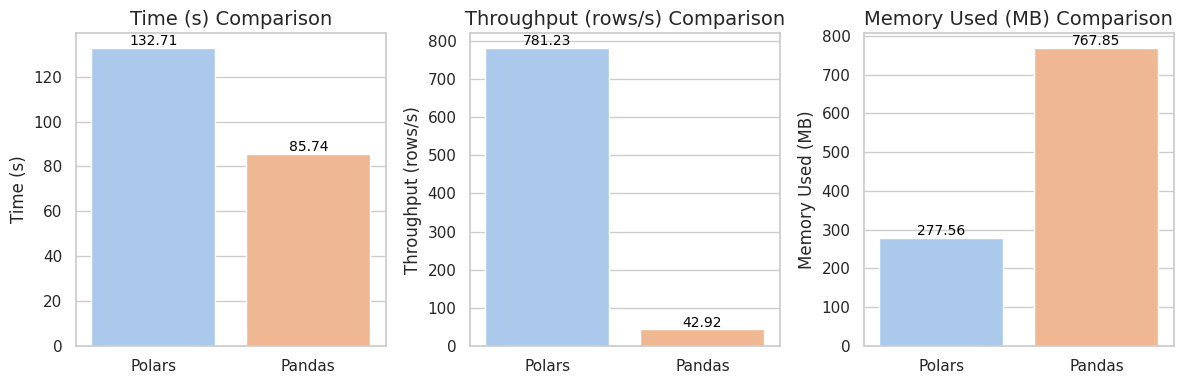

In [ ]:
import polars as pl
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_results(results):
    """Plot performance comparison results in 3 columns"""
     # Convert results to pandas DataFrame for plotting
    results_df = pl.DataFrame(results).to_pandas()

    # Set plot style
    sns.set(style="whitegrid")

    # Define metrics and color palette
    metrics = ["Time (s)", "Throughput (rows/s)", "Memory Used (MB)"]
    palette = sns.color_palette("pastel", n_colors=len(results_df['Method'].unique()))

    # Create a single row of 3 subplots
    fig, axes = plt.subplots(1, 3, figsize=(12,4))

    for i, metric in enumerate(metrics):
        ax = axes[i]
        sns.barplot(
            x="Method", y=metric, hue="Method", legend=False,
            data=results_df, palette=palette, ax=ax
        )

        # Add values on top of the bars
        for p in ax.patches:
            ax.annotate(f'{p.get_height():.2f}',
                        (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center', fontsize=10, color='black',
                        xytext=(0, 5), textcoords='offset points')

        ax.set_title(f"{metric} Comparison", fontsize=14)
        ax.set_xlabel("")
        ax.set_ylabel(metric)

    plt.tight_layout()
    plt.show()


# Collect all results
results = [polar_result, pandas_result]

# Plot results
plot_results(results)

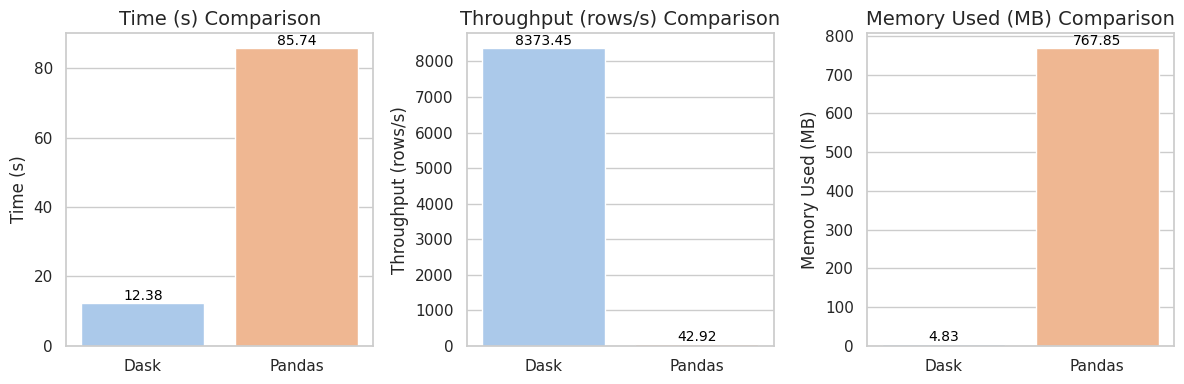

In [ ]:
import polars as pl
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_results(results):
    """Plot performance comparison results in 3 columns"""
     # Convert results to pandas DataFrame for plotting
    results_df = pl.DataFrame(results).to_pandas()

    # Set plot style
    sns.set(style="whitegrid")

    # Define metrics and color palette
    metrics = ["Time (s)", "Throughput (rows/s)", "Memory Used (MB)"]
    palette = sns.color_palette("pastel", n_colors=len(results_df['Method'].unique()))

    # Create a single row of 3 subplots
    fig, axes = plt.subplots(1, 3, figsize=(12,4))

    for i, metric in enumerate(metrics):
        ax = axes[i]
        sns.barplot(
            x="Method", y=metric, hue="Method", legend=False,
            data=results_df, palette=palette, ax=ax
        )

        # Add values on top of the bars
        for p in ax.patches:
            ax.annotate(f'{p.get_height():.2f}',
                        (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center', fontsize=10, color='black',
                        xytext=(0, 5), textcoords='offset points')

        ax.set_title(f"{metric} Comparison", fontsize=14)
        ax.set_xlabel("")
        ax.set_ylabel(metric)

    plt.tight_layout()
    plt.show()


# Collect all results
results = [dask_result, pandas_result]

# Plot results
plot_results(results)

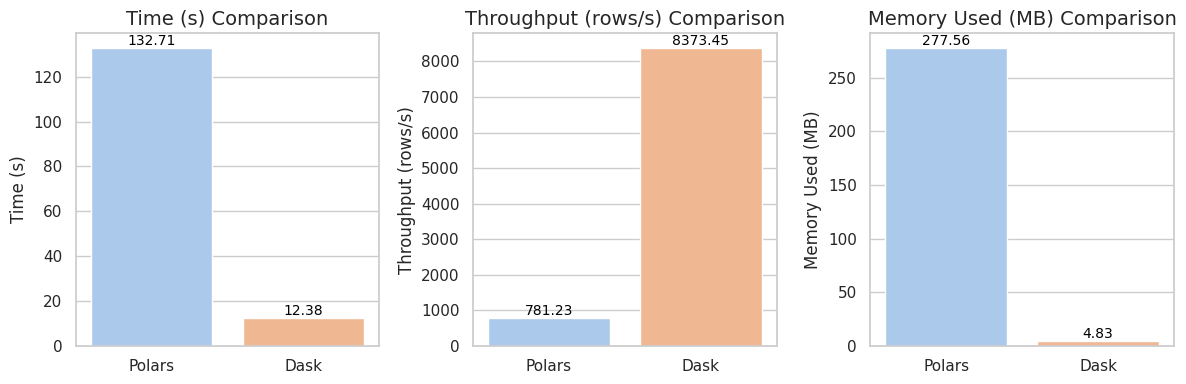

In [ ]:
import polars as pl
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_results(results):
    """Plot performance comparison results in 3 columns"""
     # Convert results to pandas DataFrame for plotting
    results_df = pl.DataFrame(results).to_pandas()

    # Set plot style
    sns.set(style="whitegrid")

    # Define metrics and color palette
    metrics = ["Time (s)", "Throughput (rows/s)", "Memory Used (MB)"]
    palette = sns.color_palette("pastel", n_colors=len(results_df['Method'].unique()))

    # Create a single row of 3 subplots
    fig, axes = plt.subplots(1, 3, figsize=(12,4))

    for i, metric in enumerate(metrics):
        ax = axes[i]
        sns.barplot(
            x="Method", y=metric, hue="Method", legend=False,
            data=results_df, palette=palette, ax=ax
        )

        # Add values on top of the bars
        for p in ax.patches:
            ax.annotate(f'{p.get_height():.2f}',
                        (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center', fontsize=10, color='black',
                        xytext=(0, 5), textcoords='offset points')

        ax.set_title(f"{metric} Comparison", fontsize=14)
        ax.set_xlabel("")
        ax.set_ylabel(metric)

    plt.tight_layout()
    plt.show()


# Collect all results
results = [polar_result, dask_result]

# Plot results
plot_results(results)